# Loading Dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import pandas as pd
import random
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
from IPython.core.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
%matplotlib inline
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings("ignore")

# Fetch from 3 datasets

In [3]:
# Getting TESS data:
paths, labels, duration = [], [], []

for dirname, _, filenames in os.walk(f"/content/gdrive/MyDrive/CEG/Semester 7/DL_project/TESS"):
    for filename in filenames:

        paths.append(os.path.join(dirname, filename))

        duration.append(round(librosa.get_duration(filename=paths[-1]), 3))

        label = filename[::-1].split('_')[0][::-1]
        labels.append(label[:-4].lower())

df_tess = pd.DataFrame({'path':paths,'duration': duration, 'dataset': 'TESS', 'emotion':labels})

df_tess['emotion'] = df_tess['emotion'].replace(['ps'], 'surprise')

df_tess.sample(5)

,path,duration,dataset,emotion
836,/content/gdrive/MyDrive/CEG/Semester 7/DL_proj...,2.045,TESS,neutral
3957,/content/gdrive/MyDrive/CEG/Semester 7/DL_proj...,2.267,TESS,disgust
737,/content/gdrive/MyDrive/CEG/Semester 7/DL_proj...,1.912,TESS,happy
803,/content/gdrive/MyDrive/CEG/Semester 7/DL_proj...,1.901,TESS,neutral
3629,/content/gdrive/MyDrive/CEG/Semester 7/DL_proj...,1.780,TESS,angry


In [4]:
# Getting RAVDESS data
paths, labels, duration = [], [], []

for dirname, _, filenames in os.walk(f"/content/gdrive/MyDrive/CEG/Semester 7/DL_project/RAVDESS"):
    for filename in filenames:

        paths.append(os.path.join(dirname, filename))

        duration.append(round(librosa.get_duration(filename=paths[-1]), 3))

        label = filename[::-1].split('_')[0][::-1]

        if label[6:8] == '01':
            labels.append('neutral')
        elif label[6:8] == '02':
            labels.append('calm')
        elif label[6:8] == '03':
            labels.append('happy')
        elif label[6:8] == '04':
            labels.append('sad')
        elif label[6:8] == '05':
            labels.append('angry')
        elif label[6:8] == '06':
            labels.append('fear')
        elif label[6:8] == '07':
            labels.append('disgust')
        elif label[6:8] == '08':
            labels.append('surprise')

df_ravdess = pd.DataFrame({'path':paths,'duration': duration, 'dataset': 'RAVDESS', 'emotion':labels})

df_ravdess.sample(5)

,path,duration,dataset,emotion
747,/content/gdrive/MyDrive/CEG/Semester 7/DL_proj...,3.437,RAVDESS,sad
753,/content/gdrive/MyDrive/CEG/Semester 7/DL_proj...,3.770,RAVDESS,angry
1402,/content/gdrive/MyDrive/CEG/Semester 7/DL_proj...,4.071,RAVDESS,angry
365,/content/gdrive/MyDrive/CEG/Semester 7/DL_proj...,3.804,RAVDESS,calm
714,/content/gdrive/MyDrive/CEG/Semester 7/DL_proj...,3.737,RAVDESS,disgust


In [5]:
# Getting SAVEE data
paths, labels, duration = [], [], []

for dirname, _, filenames in os.walk(f"/content/gdrive/MyDrive/CEG/Semester 7/DL_project/SAVEE/AudioData"):
    for filename in filenames:

        paths.append(os.path.join(dirname, filename))

        label = filename[::-1].split('_')[0][::-1]

        if label[:1] == 'a':
            labels.append('angry')
        elif label[:1] == 'd':
            labels.append('disgust')
        elif label[:1] == 'f':
            labels.append('fear')
        elif label[:1] == 'h':
            labels.append('happy')
        elif label[:1] == 'n':
            labels.append('neutral')
        elif label[:1] == 's':
            if label[:2] == 'sa':
                labels.append('sad')
            else:
                labels.append('surprise')

paths = paths[1:] # to filter out 'info.txt' file

for file in paths:
    duration.append(round(librosa.get_duration(filename=file), 3))

df_savee = pd.DataFrame({'path':paths, 'duration': duration, 'dataset': 'SAVEE', 'emotion':labels})

df_savee.sample(5)

,path,duration,dataset,emotion
103,/content/gdrive/MyDrive/CEG/Semester 7/DL_proj...,2.460,SAVEE,neutral
182,/content/gdrive/MyDrive/CEG/Semester 7/DL_proj...,4.953,SAVEE,fear
2,/content/gdrive/MyDrive/CEG/Semester 7/DL_proj...,3.170,SAVEE,disgust
45,/content/gdrive/MyDrive/CEG/Semester 7/DL_proj...,3.585,SAVEE,neutral
33,/content/gdrive/MyDrive/CEG/Semester 7/DL_proj...,1.810,SAVEE,fear


# Concatenate datasets

In [6]:
# Merging datasets:

df = pd.concat([df_tess, df_ravdess, df_savee])

# Remove calm - less samples
df = df[df['emotion'].str.contains('calm') == False].reset_index(drop=True)

print('Final dataset')

df.sample(5)

Final dataset


,path,duration,dataset,emotion
6926,/content/gdrive/MyDrive/CEG/Semester 7/DL_proj...,2.609,SAVEE,neutral
3159,/content/gdrive/MyDrive/CEG/Semester 7/DL_proj...,2.341,TESS,sad
4700,/content/gdrive/MyDrive/CEG/Semester 7/DL_proj...,2.438,TESS,disgust
813,/content/gdrive/MyDrive/CEG/Semester 7/DL_proj...,2.056,TESS,neutral
3846,/content/gdrive/MyDrive/CEG/Semester 7/DL_proj...,2.339,TESS,disgust


In [8]:
df.shape

(7328, 4)

In [10]:
df.to_csv(f"/content/gdrive/MyDrive/CEG/Semester 7/DL_project/dataset.csv")

# Load dataset

In [11]:
df = pd.read_csv(f"/content/gdrive/MyDrive/CEG/Semester 7/DL_project/dataset.csv")

# Exploratory Data Analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7328 non-null   int64  
 1   path        7328 non-null   object 
 2   duration    7328 non-null   float64
 3   dataset     7328 non-null   object 
 4   emotion     7328 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 286.4+ KB


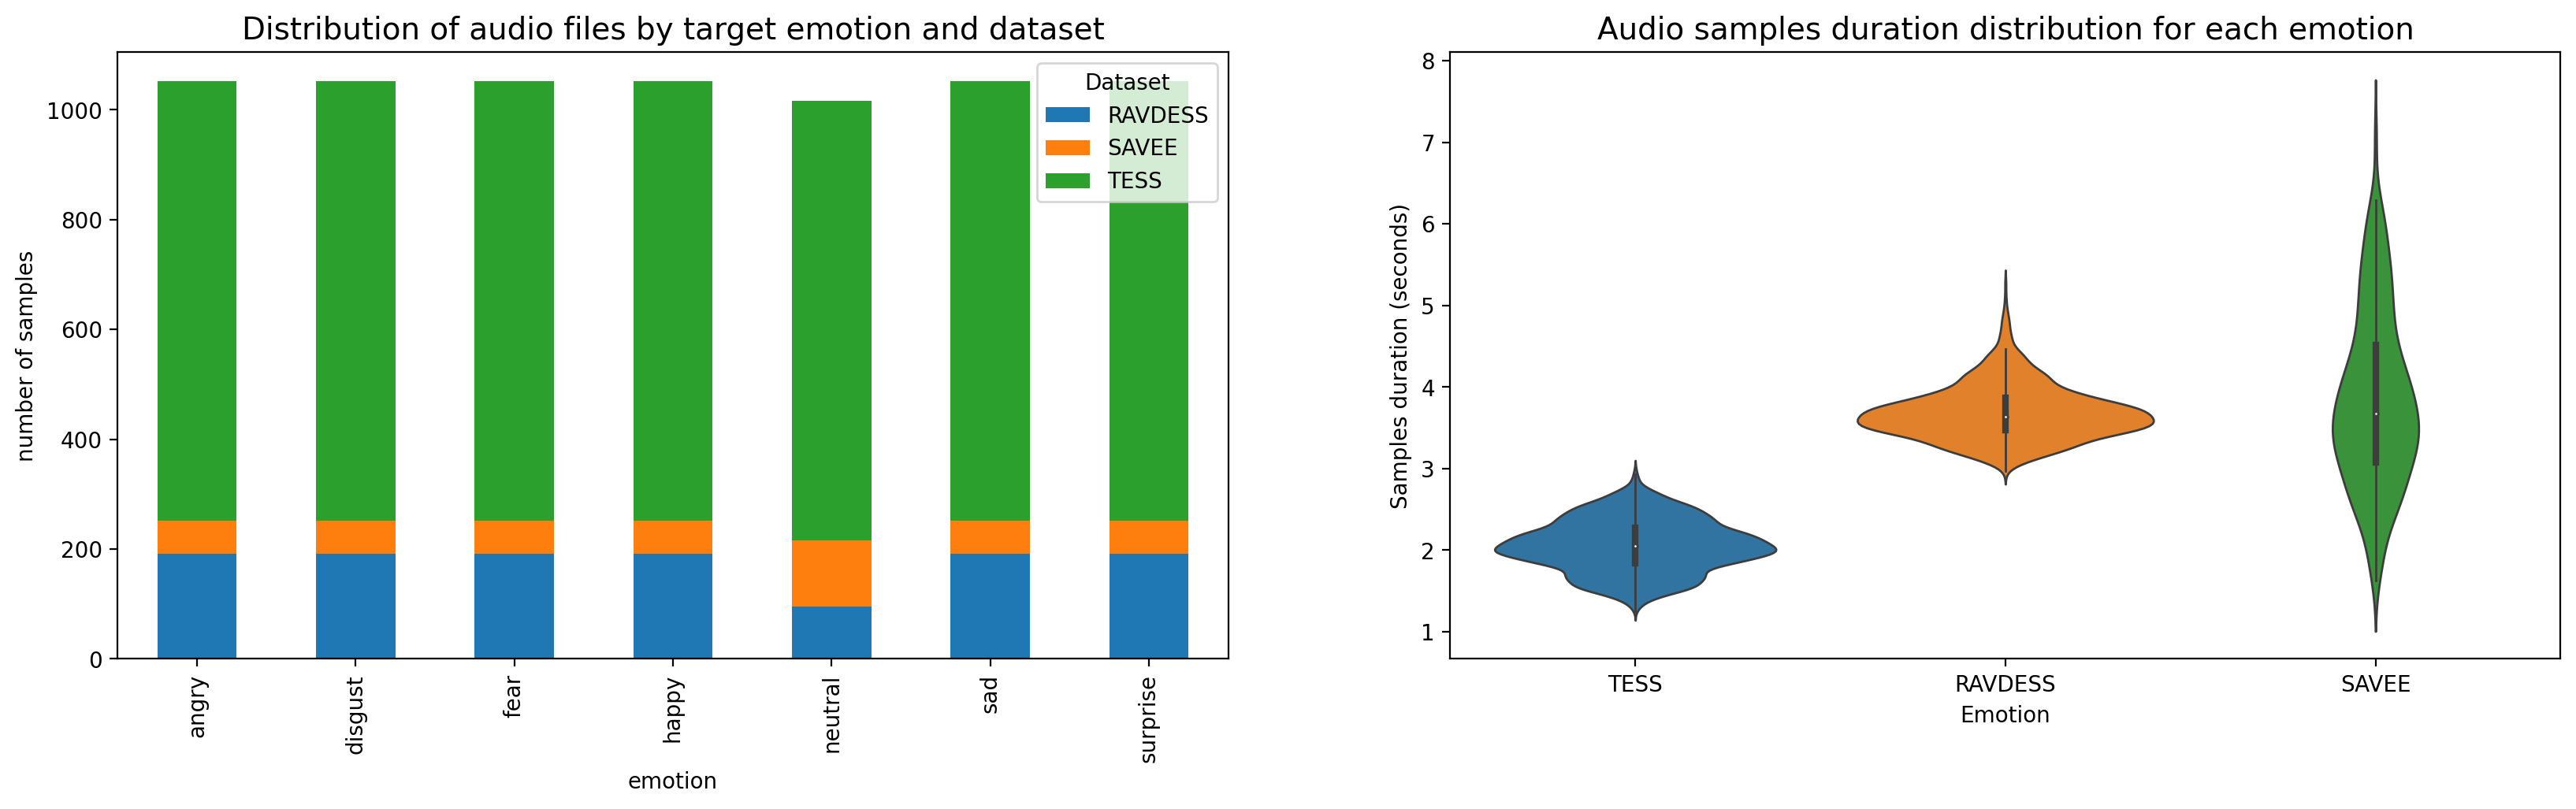

In [13]:
# Figure with 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Check samples distribution
df.groupby(['emotion','dataset']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Distribution of audio files by target emotion and dataset', size=14)
axes[0].set_ylabel('number of samples')
axes[0].legend(title='Dataset')

# Check duration distribution by each source using violin plots
sns.violinplot(x=df['dataset'],y=df['duration'], linewidth=1, ax=axes[1])
axes[1].set_xlabel('Emotion')
axes[1].set_ylabel('Samples duration (seconds)')
axes[1].set_title('Audio samples duration distribution for each emotion', size=14)

plt.show()

In [14]:
# function to display samples information by emotion
# note that a random samples is generated each time the function is called
# this is on purpose as to check different samples of each emotion every time

def show_audio(emotion):
    # create sublots
    fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(20,4))
    # filter dataframe to emotion)
    df_show = df.loc[df['emotion'] == emotion].reset_index(drop=True)
    index = random.randint(0, df_show.shape[0])

    # load audio file:
    y, sr = librosa.load(df_show.path[index], sr=16000)

    # Show waveform
    librosa.display.waveshow(y, sr=sr, ax=axs[0])
    axs[0].set_title('Waveform')

    # Extract fundamental frequency (f0) using a probabilistic approach
    f0, _, _ = librosa.pyin(y, sr=sr, fmin=50, fmax=1500, frame_length=2048)

    # Establish timepoint of f0 signal
    timepoints = np.linspace(0, df_show.duration[index], num=len(f0), endpoint=False)

    # Compute short-time Fourier Transform
    x_stft = np.abs(librosa.stft(y))

    # Apply logarithmic dB-scale to spectrogram and set maximum to 0 dB
    x_stft = librosa.amplitude_to_db(x_stft, ref=np.max)

    # Plot STFT spectrogram
    librosa.display.specshow(x_stft, sr=sr, x_axis="time", y_axis="log", ax=axs[1])

    # Plot fundamental frequency (f0) in spectrogram plot
    axs[1].plot(timepoints, f0, color="cyan", linewidth=4)
    axs[1].set_title('Spectrogram with fundamental frequency')

    # Extract 'n_mfcc' numbers of MFCCs components - in this case 30
    x_mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

    # Plot MFCCs
    librosa.display.specshow(x_mfccs, sr=sr, x_axis="time", norm=Normalize(vmin=-50, vmax=50), ax=axs[2])
    axs[2].set_title('MFCCs')

    # Show metadata in title
    plt.suptitle('File: {}  -  Emotion: {}'.format(df_show.path[index], df_show.emotion[index]), size=14)
    plt.tight_layout()
    plt.show()

    # Display media player for the selected file
    display(ipd.Audio(y, rate=sr))

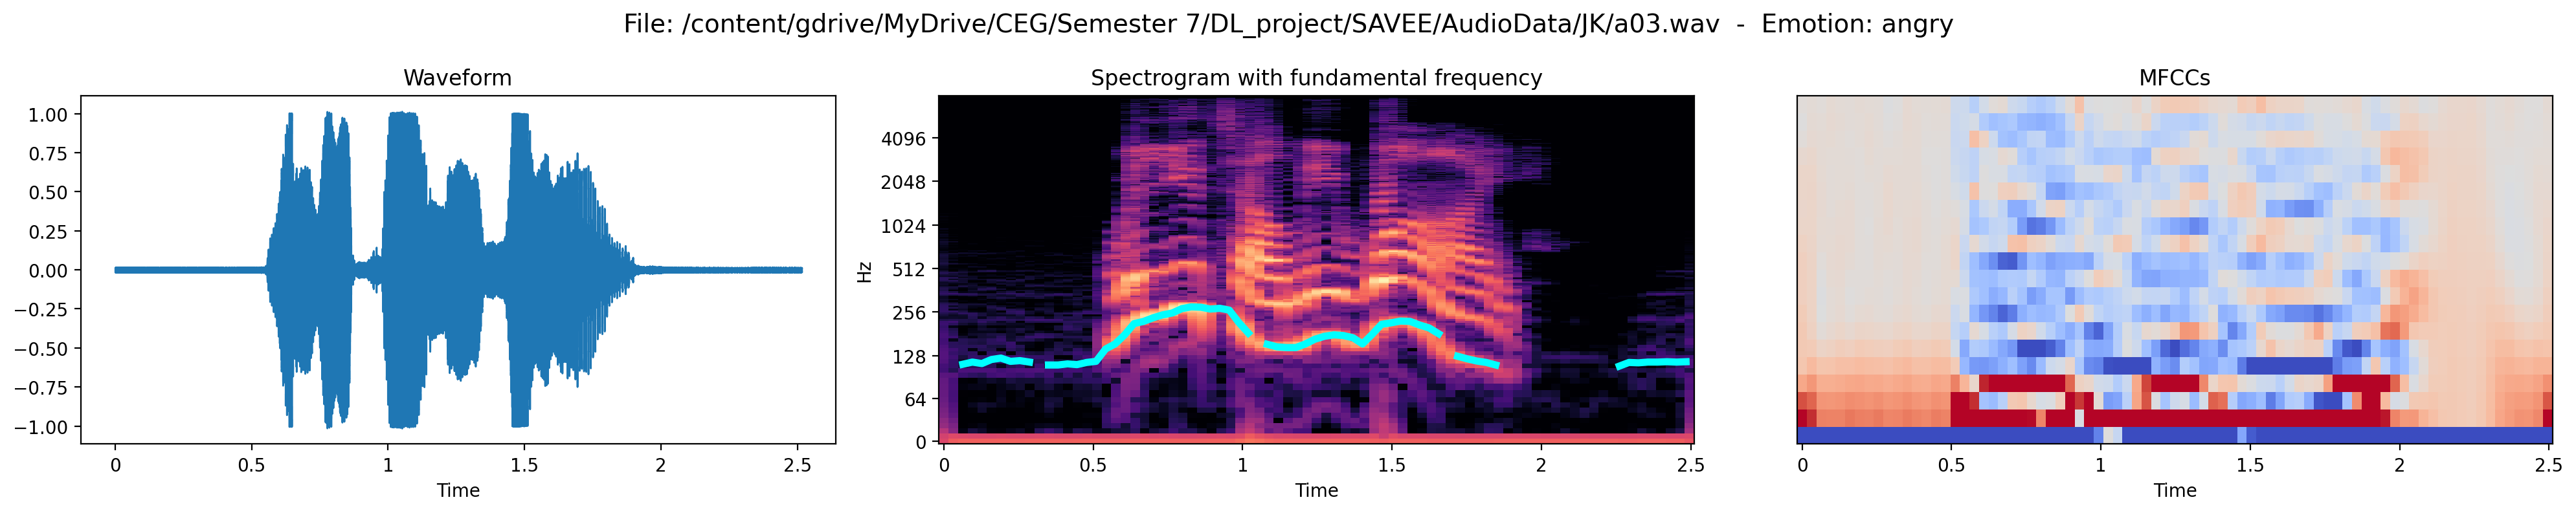

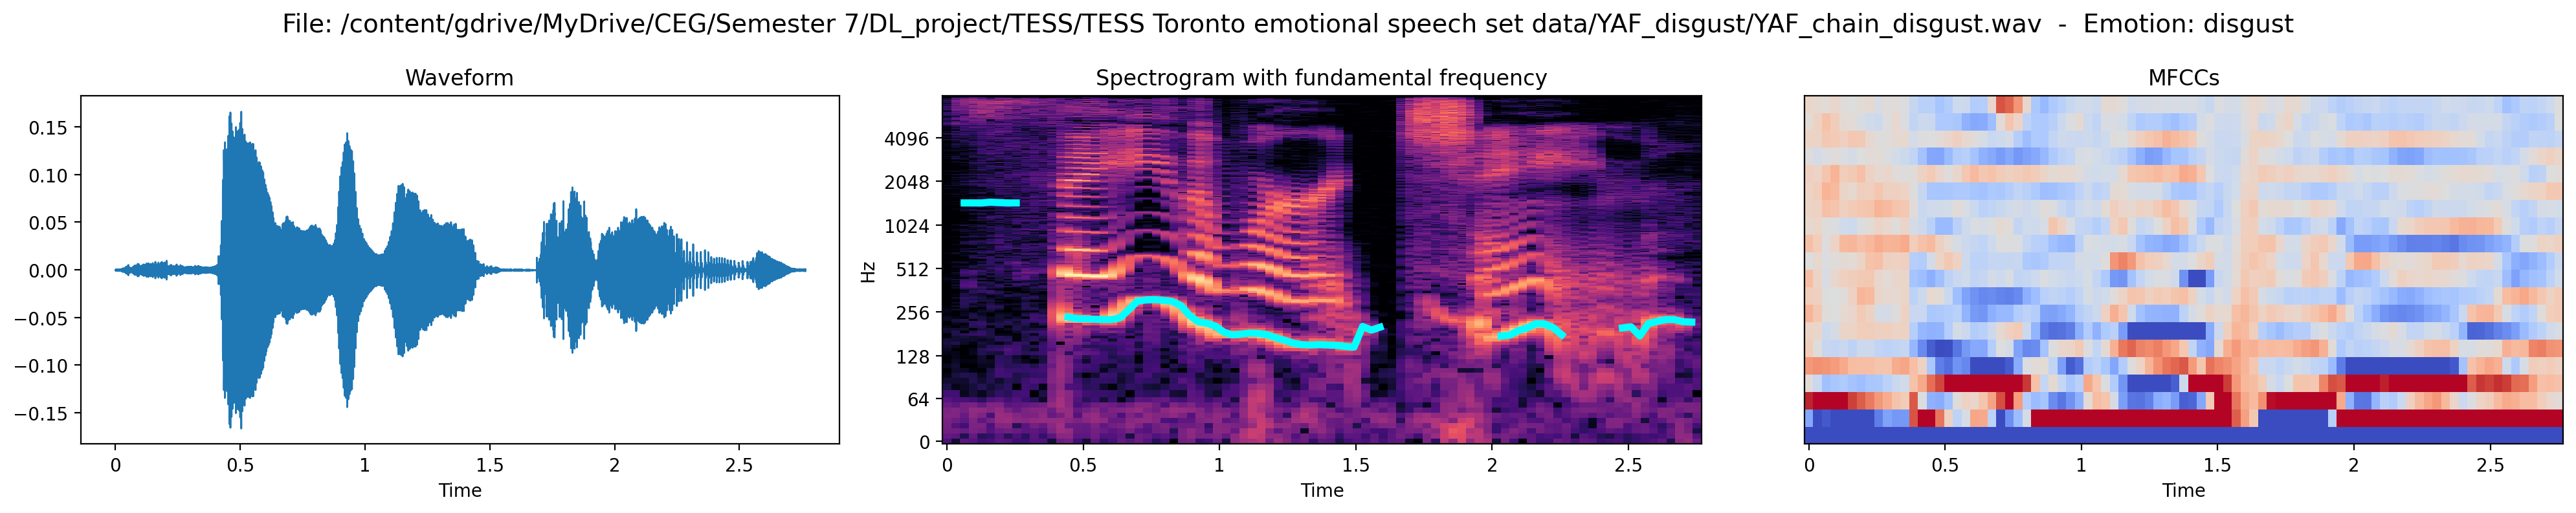

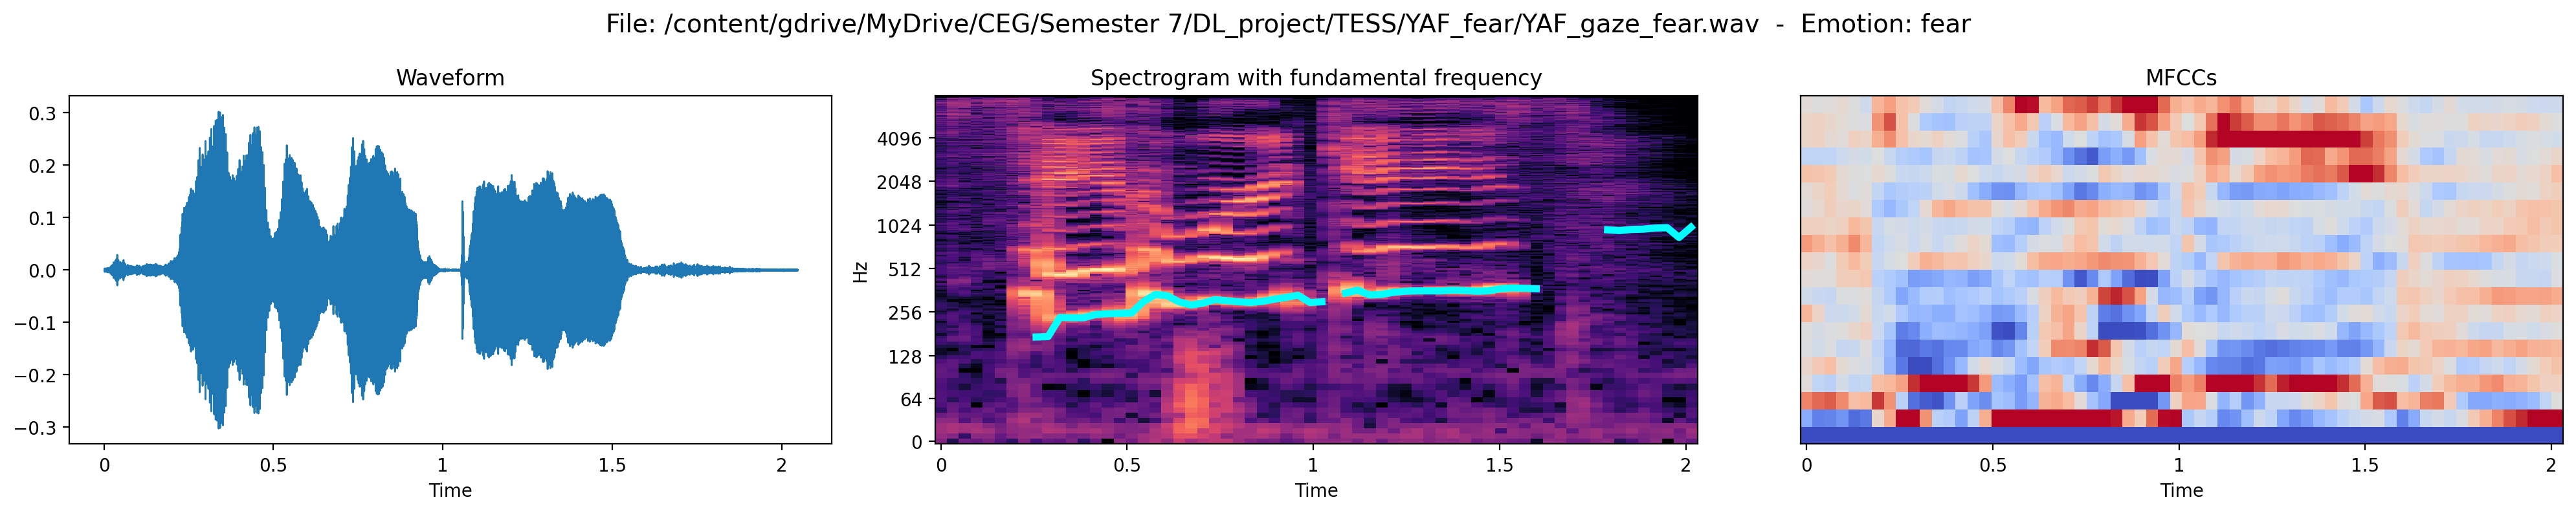

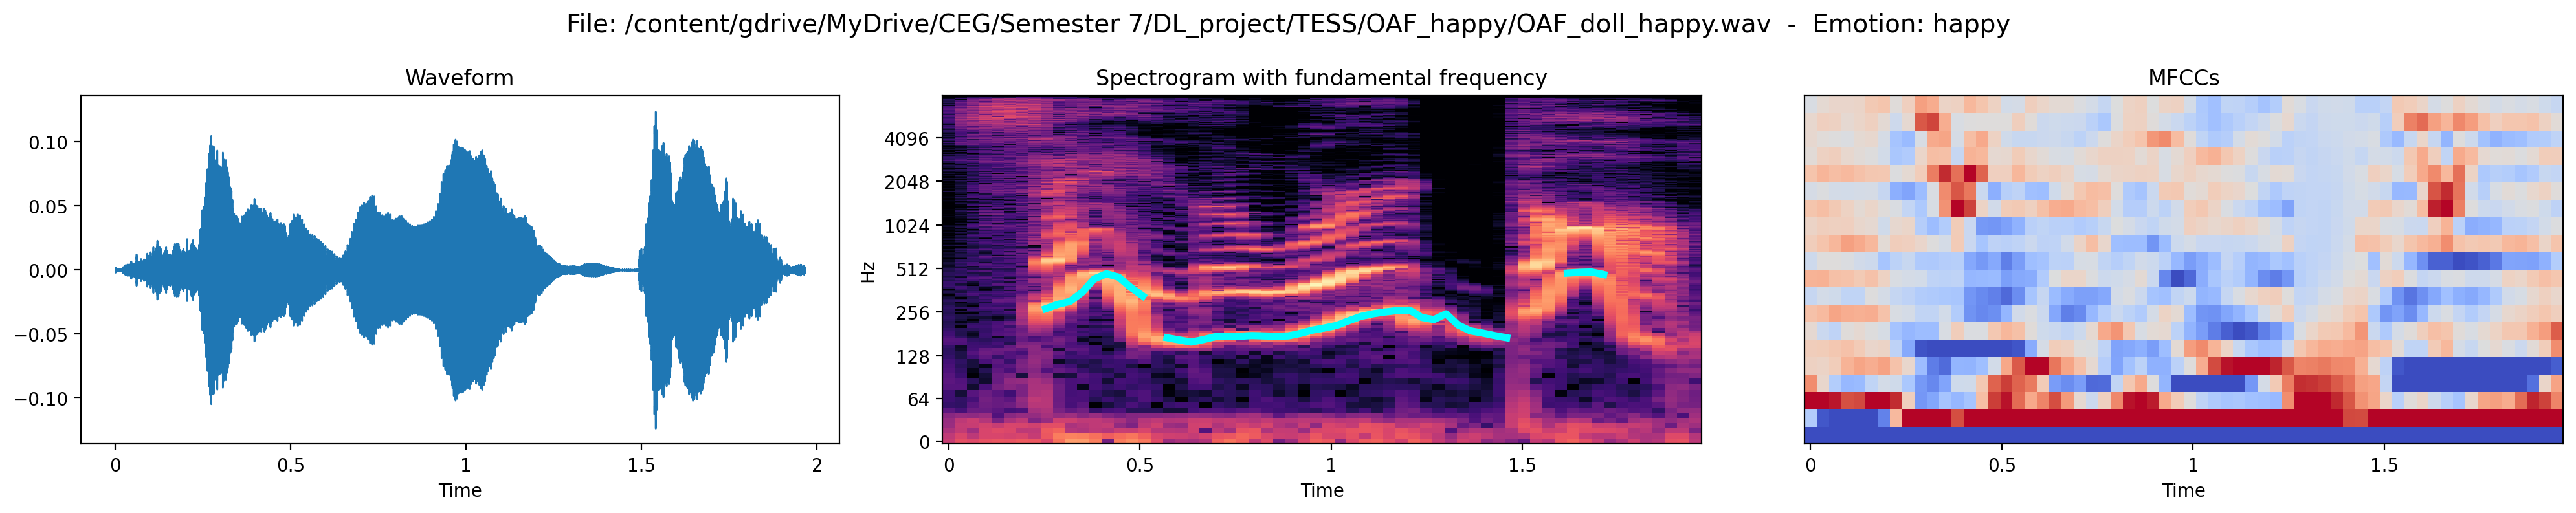

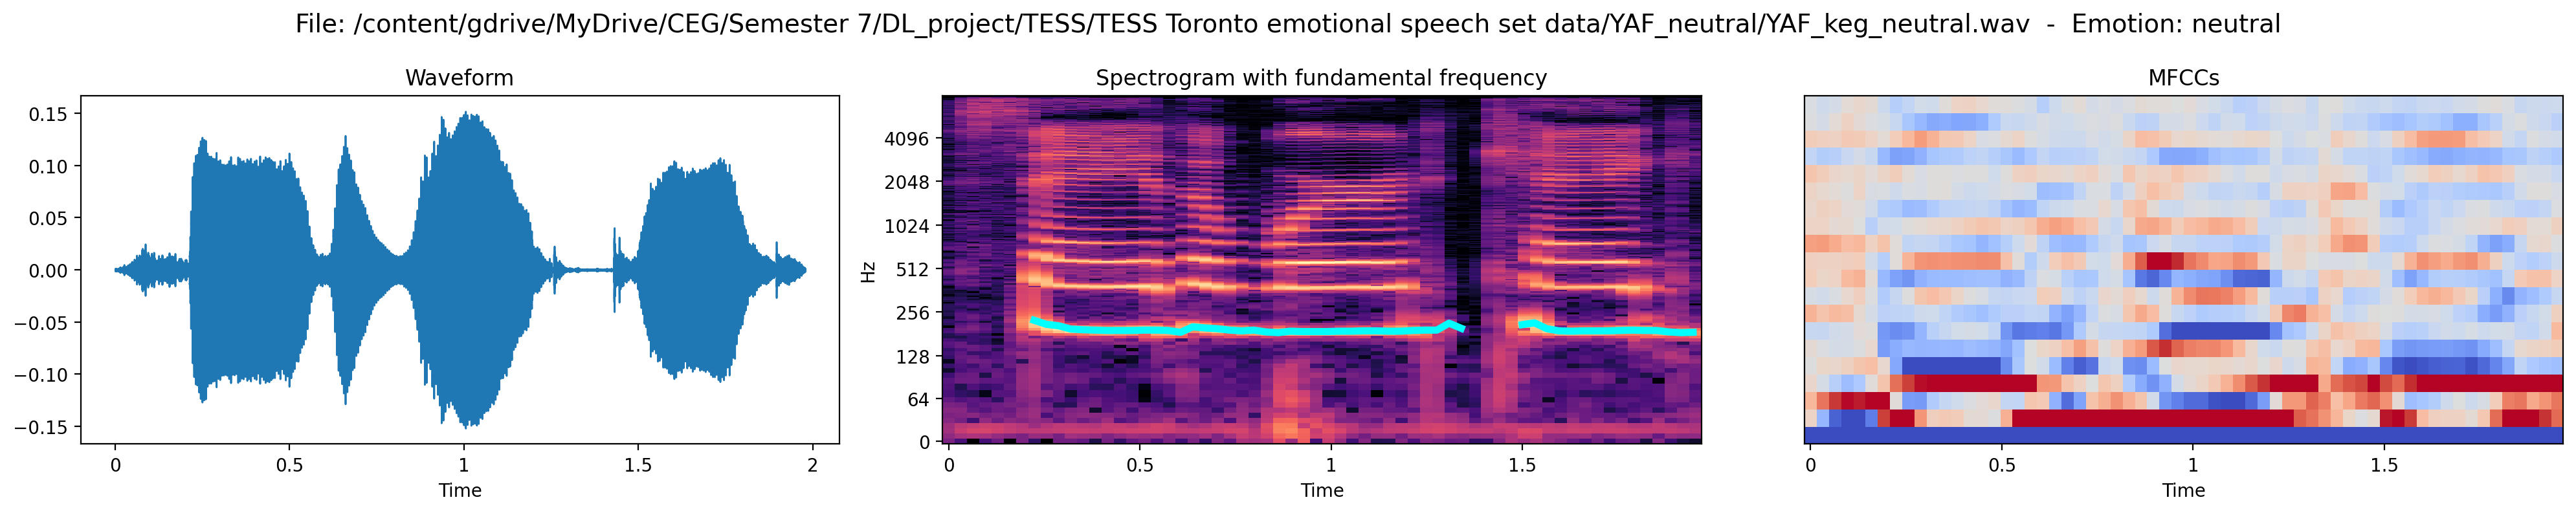

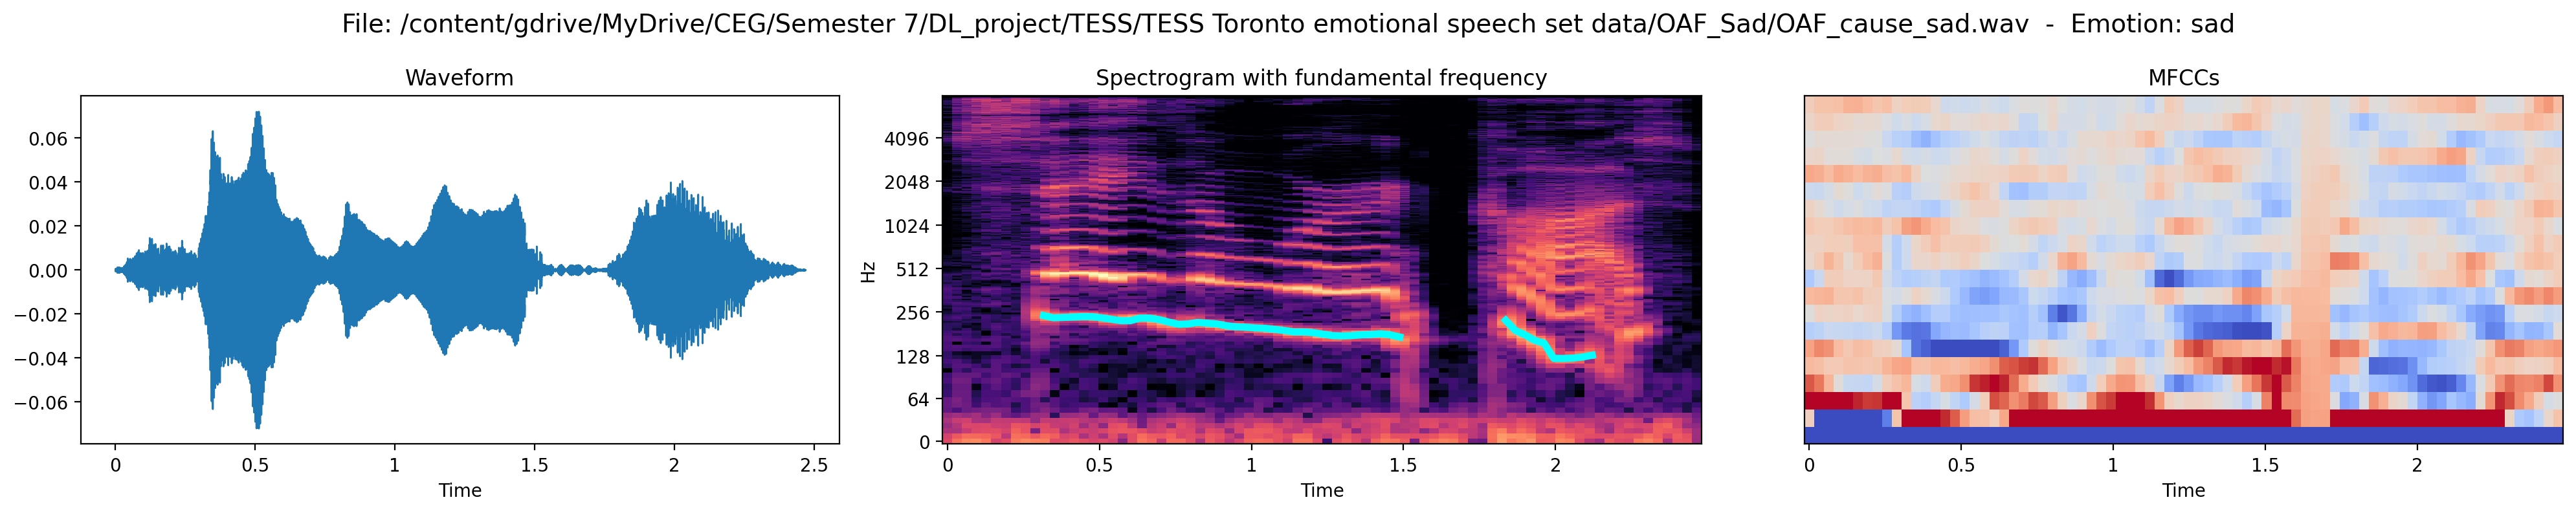

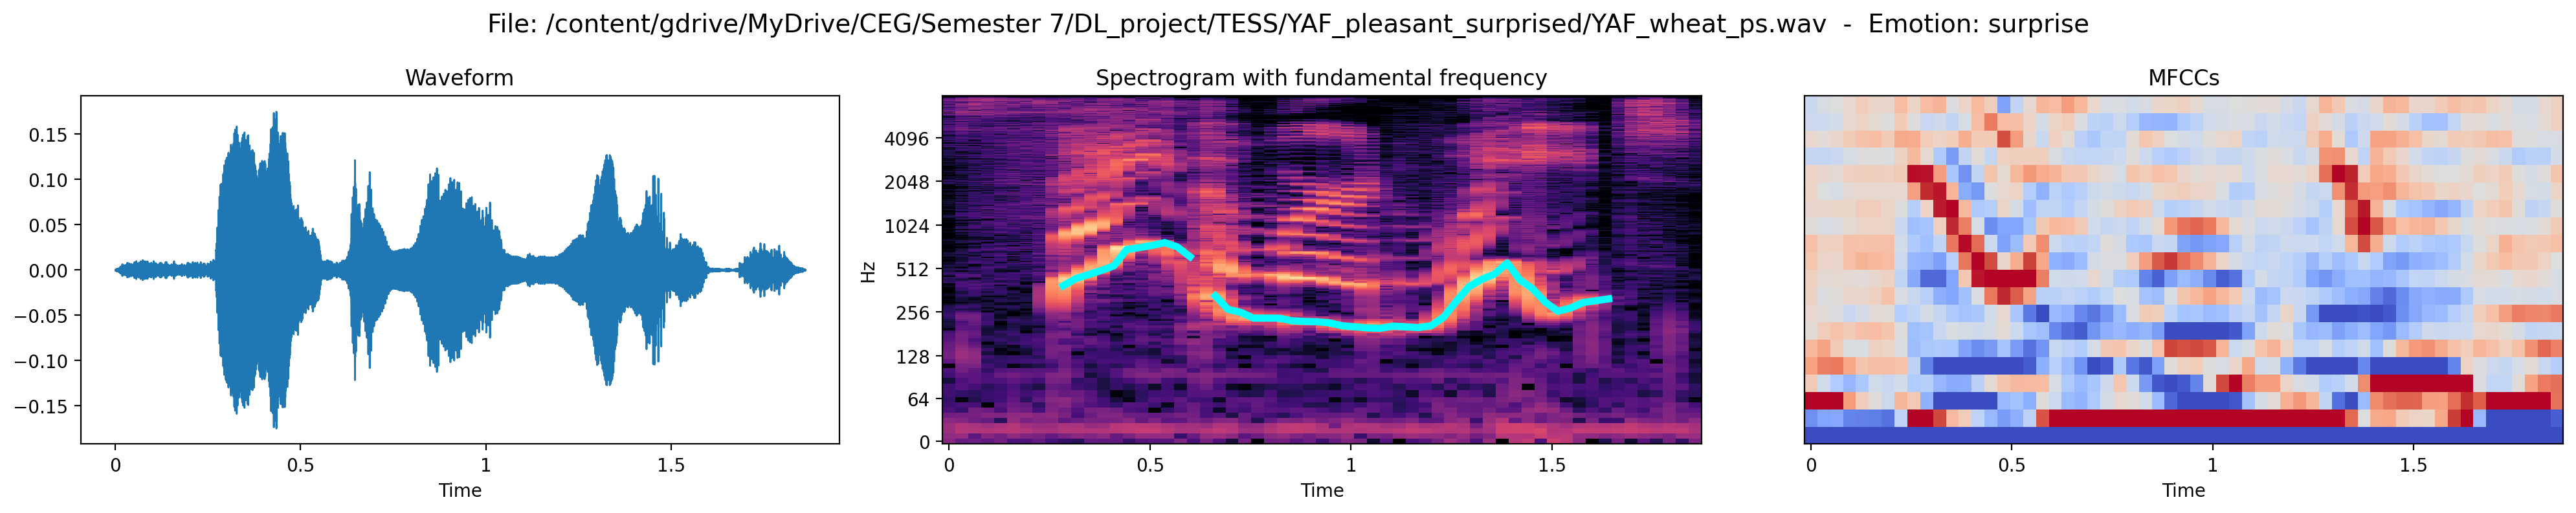

In [ ]:
# Getting ordered list of emotions ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
emotions = sorted(list(df.emotion.unique()))

# Get waveforms, spectograms, mfccs and media player for each emotion
for emotion in emotions:
    show_audio(emotion)